<a href="https://colab.research.google.com/github/kinzinzz/Pytorch/blob/master/10%ED%8C%8C%EC%9D%B4%ED%86%A0%EC%B9%98_%EC%8B%A0%EA%B2%BD%EB%A7%9D_%EC%83%9D%EC%84%B1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [ ]:
class Net(nn.Module):

    def __init__(self):
        super(Net, self).__init__()

        self.conv1 = nn.Conv2d(1,6,3)
        self.conv2 = nn.Conv2d(6,16,3)
        self.fc1 = nn.Linear(16*6*6, 120)
        self.fc2 = nn.Linear(120,84)
        self.fc3 = nn.Linear(84,10)

    def forward(self,x):
        x = F.max_pool2d(F.relu(self.con1(x)), (2,2))
        x = F.max_pool2d(F.relu(self.conv2(x)), 2)
        x = x.view(-1, self.num_flat_features(x))
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.applyfc3(x)

        return x

    def num_flat_features(self,x):
        size = x.size()[1:]
        num_features = 1
        for s in size:
            num_features *= 5
        return num_features

net = Net()
print(net)          

Net(
  (conv1): Conv2d(1, 6, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=576, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


In [ ]:
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

<ipython-input-3-4c600c44bb91>:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


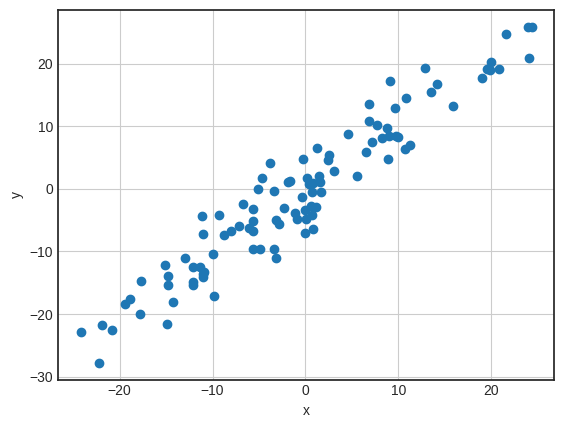

In [ ]:
# 데이터 생성
X = torch.randn(100, 1)*10
y = X + 3*torch.randn(100,1)
plt.plot(X.numpy(), y.numpy(), 'o')
plt.ylabel('y')
plt.xlabel('x')
plt.grid()
plt.show()

In [ ]:
# 신경망 구성
class LinearRegressionModel(nn.Module):
    
    def __init__(self):
        super(LinearRegressionModel, self).__init__()
        self.linear = nn.Linear(1,1)

    def forward(self, x):
        pred = self.linear(x)
        return pred

In [ ]:
torch.manual_seed(111)
model = LinearRegressionModel()
print(model)

LinearRegressionModel(
  (linear): Linear(in_features=1, out_features=1, bias=True)
)


In [ ]:
print(list(model.parameters()))

[Parameter containing:
tensor([[0.4311]], requires_grad=True), Parameter containing:
tensor([0.8280], requires_grad=True)]


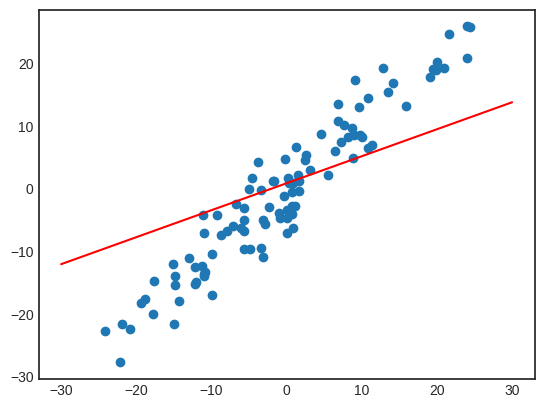

In [ ]:
w, b = model.parameters()
def get_params():
    return w[0][0].item(), b[0].item()

def plot_fit(title):
    plt.title = title
    w1, b1 = get_params()
    x1 = np.array([-30, 30])
    y1 = w1 * x1 + b1
    plt.plot(x1, y1, 'r')
    plt.scatter(X,y)
    plt.show()

plot_fit("Initial model")

In [ ]:
# 손실함수 옵티마이저
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.001)

In [ ]:
epochs = 100
losses = []
for epoch in range(epochs):
    optimizer.zero_grad()
    
    y_pred = model(X)
    loss = criterion(y_pred, y)
    losses.append(loss.detach().numpy())
    loss.backward()
    
    optimizer.step()

    if epoch % 10 == 0:
        print('Epoch: {:3d}\tloss: {:.4f}'.format(epoch+1, loss))

Epoch:   1	loss: 12.6920
Epoch:  11	loss: 12.6849
Epoch:  21	loss: 12.6781
Epoch:  31	loss: 12.6716
Epoch:  41	loss: 12.6654
Epoch:  51	loss: 12.6594
Epoch:  61	loss: 12.6536
Epoch:  71	loss: 12.6481
Epoch:  81	loss: 12.6427
Epoch:  91	loss: 12.6376


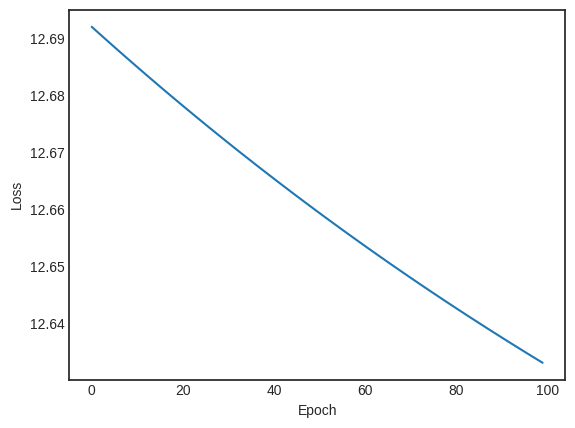

In [ ]:
# 시각화
plt.plot(range(epochs), losses)
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()

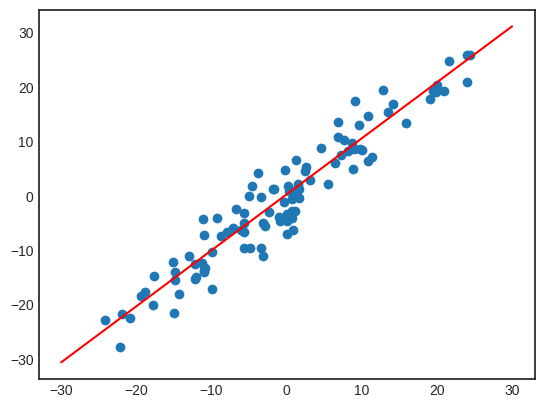

In [ ]:
plot_fit("Trainde Model")